## Borehole


In [12]:
#!/usr/bin/env python
import torch
from lmgp_pytorch.models import LMGP
from lmgp_pytorch.test_functions.physical import borehole
from lmgp_pytorch.preprocessing import train_test_split_normalizeX
from lmgp_pytorch.utils import set_seed
from lmgp_pytorch.optim import fit_model_scipy

random_state = 12345
set_seed(random_state)


############################ Generate Data #########################################
X, y = borehole(n=200, random_state=12345)
############################## train test split ####################################
Xtrain, Xtest, ytrain, ytest = train_test_split_normalizeX(
    X, y, test_size=0.99)
############################### Model ##############################################
model = LMGP(Xtrain, ytrain)
############################### Fit Model ##########################################
_ = fit_model_scipy(model, num_restarts=12)
############################### Score ##############################################
model.score(Xtest, ytest, plot_MSE=True)
model.show()


c:\Users\temp\anaconda3\envs\LMGP\lib\site-packages\lvgp_pytorch-0.1.1-py3.9.egg\lmgp_pytorch\preprocessing\normalizeX.py:16: RuntimeWarning: invalid value encountered in true_divide
  temp=(temp - mean_xtrain)/std_xtrain
c:\Users\temp\anaconda3\envs\LMGP\lib\site-packages\lvgp_pytorch-0.1.1-py3.9.egg\lmgp_pytorch\preprocessing\normalizeX.py:26: RuntimeWarning: divide by zero encountered in true_divide
  temp2 = (temp2 - mean_xtrain)/std_xtrain
c:\Users\temp\anaconda3\envs\LMGP\lib\site-packages\lvgp_pytorch-0.1.1-py3.9.egg\lmgp_pytorch\preprocessing\normalizeX.py:26: RuntimeWarning: invalid value encountered in true_divide
  temp2 = (temp2 - mean_xtrain)/std_xtrain


RuntimeError: You must train on the training inputs!

In [6]:
#!/usr/bin/env python
import torch
from lmgp_pytorch.models import LMGP
from lmgp_pytorch.test_functions.physical import borehole
from lmgp_pytorch.preprocessing import train_test_split_normalizeX
from lmgp_pytorch.utils import set_seed
from lmgp_pytorch.optim import fit_model_scipy

random_state = 12345
set_seed(random_state)


############################ Generate Data #########################################
X, y = borehole(n=10000, random_state=12345)
############################## train test split ####################################
Xtrain, Xtest, ytrain, ytest = train_test_split_normalizeX(
    X, y, test_size=0.99)
############################### Model ##############################################
model = LMGP(Xtrain, ytrain)
############################### Fit Model ##########################################
_ = fit_model_scipy(model, num_restarts=12)
############################### Score ##############################################
model.score(Xtest, ytest, plot_MSE=True)
model.show()


ModuleNotFoundError: No module named 'lmgp_pytorch.test_functions'

## MF Wing

################MSE######################
MSE = 4.665
#########################################
################Noise####################
The estimated noise parameter (varaince) is tensor([2.2465])
The estimated noise std is tensor([1.4988])
#########################################
################MSE######################
MSE = 1.430
#########################################
################Noise####################
The estimated noise parameter (varaince) is tensor([2.2465])
The estimated noise std is tensor([1.4988])
#########################################
################MSE######################
MSE = 1.944
#########################################
################Noise####################
The estimated noise parameter (varaince) is tensor([2.2465])
The estimated noise std is tensor([1.4988])
#########################################
################MSE######################
MSE = 3.635
#########################################
################Noise####################
The est

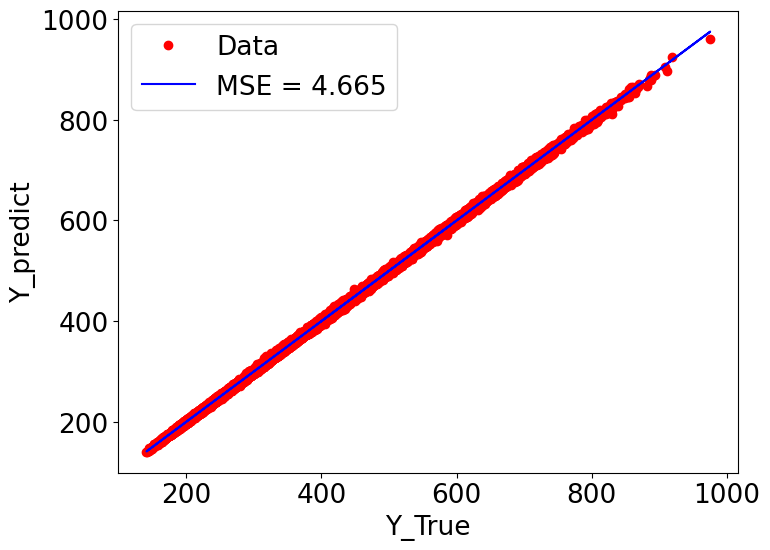

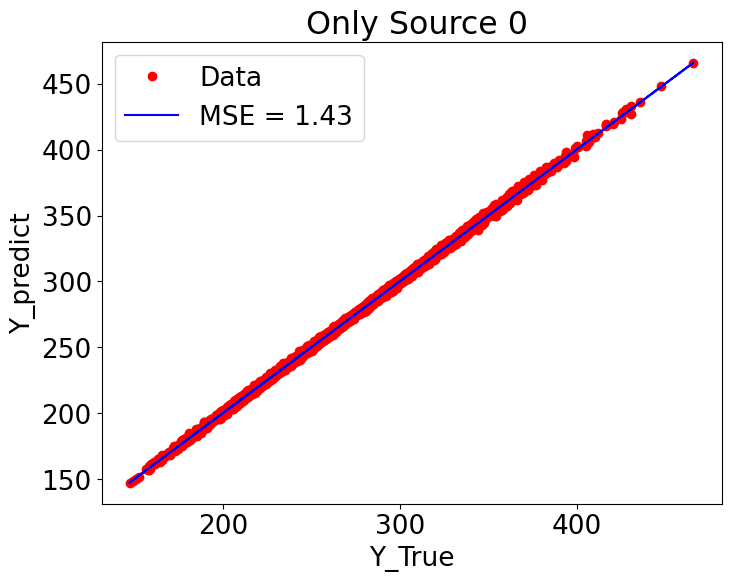

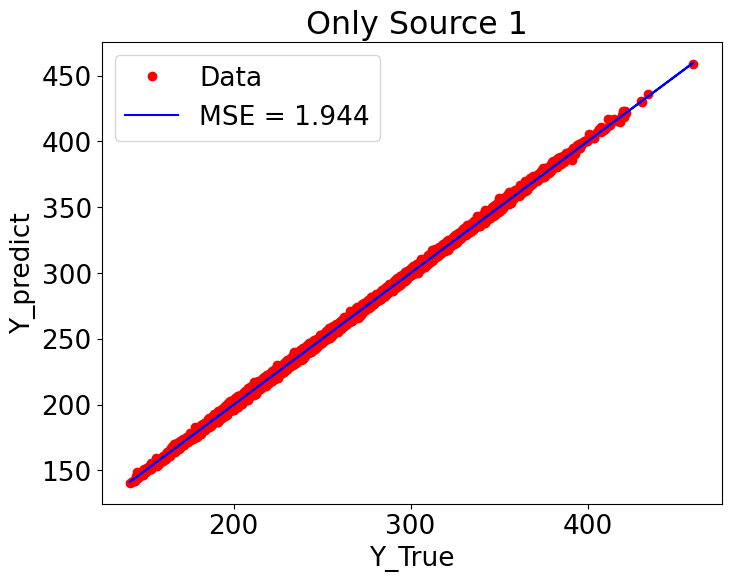

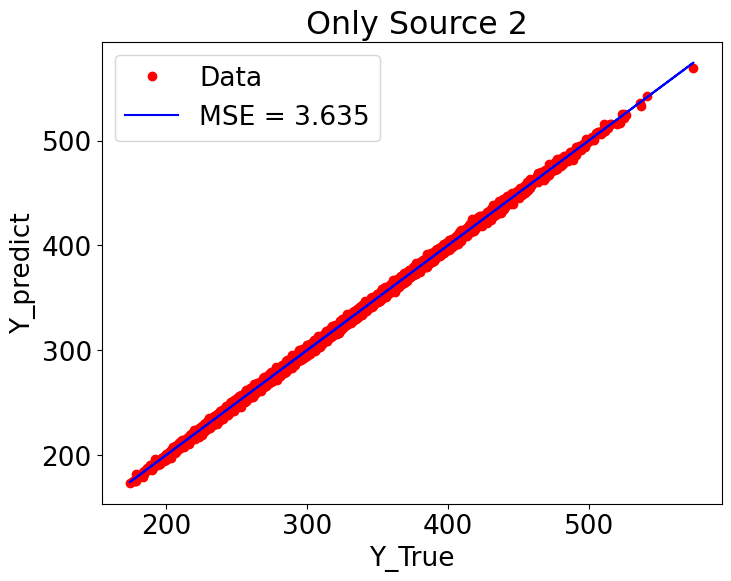

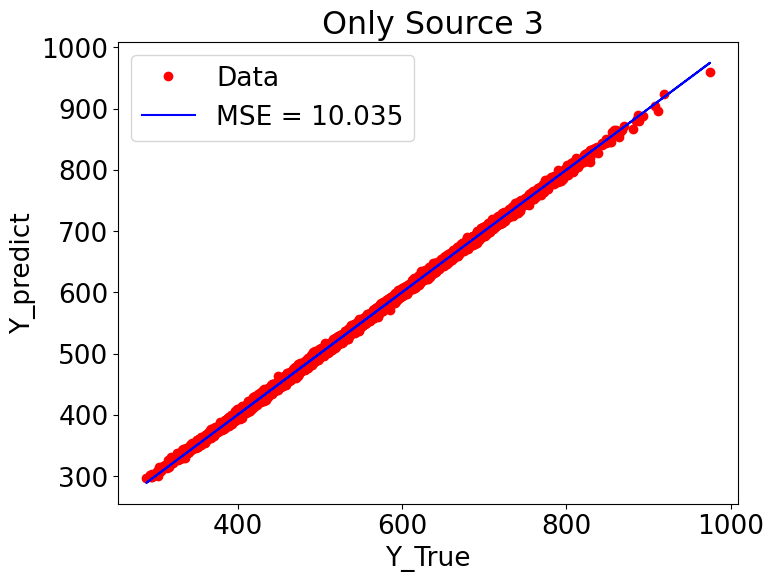

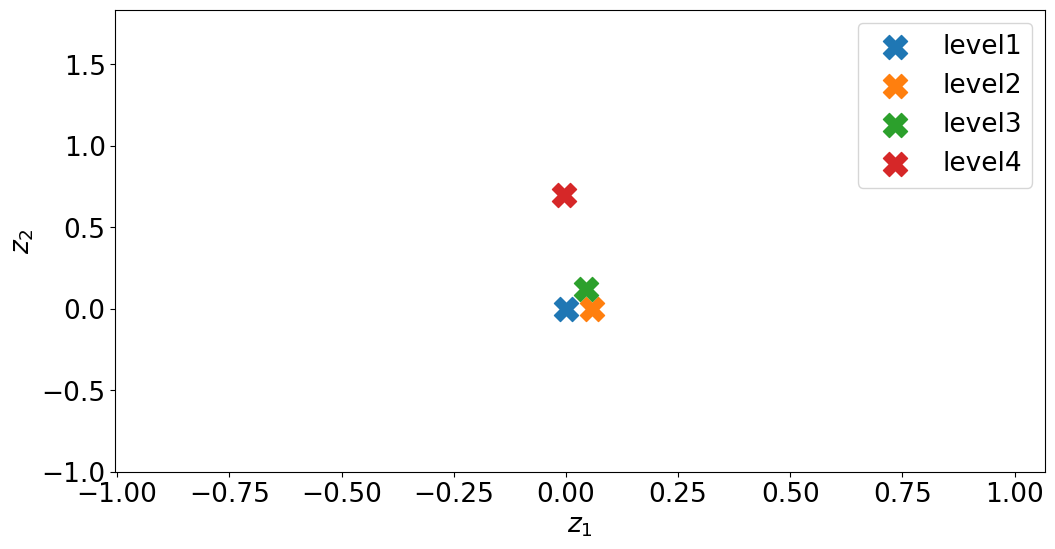

In [14]:
#!/usr/bin/env python
# coding: utf-8

from lmgp_pytorch.models import LMGP
from lmgp_pytorch.test_functions.multi_fidelity import multi_fidelity_wing
from lmgp_pytorch.preprocessing import train_test_split_normalizeX
from lmgp_pytorch.utils import set_seed
from lmgp_pytorch.optim import fit_model_scipy

###############Parameters########################
random_state = 4
set_seed(random_state)
qual_index = {10:4}
num={'0': 10, '1': 20, '2': 30, '3': 40}
noise_std={'0': 0.5, '1': 1.0, '2': 1.5, '3': 2.0}
############################ Generate Data #########################################
X, y = multi_fidelity_wing(n = num, noise_std= noise_std, random_state = random_state)
############################## train test split ####################################
Xtrain, Xtest, ytrain, ytest = train_test_split_normalizeX(X, y, test_size = 0.99, 
    qual_index_val= qual_index, stratify= X[...,list(qual_index.keys())])
############################### Model ##############################################
model = LMGP(Xtrain, ytrain, qual_ind_lev=qual_index)
############################### Fit Model ##########################################
_ = fit_model_scipy(model)
############################### Score ##############################################
model.score(Xtest, ytest, plot_MSE=True, seperate_levels=True)
############################### Latent Map ##############################################
_ = model.visualize_latent()
model.show()